In [55]:
from warnings import filterwarnings
filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

https://www.kaggle.com/code/smailaar/bank-marketing-clustering-ml

In [56]:
df = pd.read_csv("bank_marketing_dataset.csv")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


## We check the dimensions

In [57]:
df.shape

(41188, 21)

## We check the columns

In [58]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'subscribed'],
      dtype='object')

In [59]:
# Configure pandas to display all columns
pd.set_option("display.max_columns", None)

# Data dictionnary

# Data Exploration

## Describe the data

In [60]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


## Dealing with missing values

In [61]:
def missing_values(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(columns={
        0: 'Missing Values',
        1: '% of Total Values'
    })
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)
    print("Dataframe has " + str(df.shape[1]) + " columns.")
    print("There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")
    
    return mis_val_table_ren_columns

In [62]:
miss_values = missing_values(df)
miss_values.head(20)

Dataframe has 21 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


## Looking at categorical/non-numerical columns

Value counts for job:
job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64




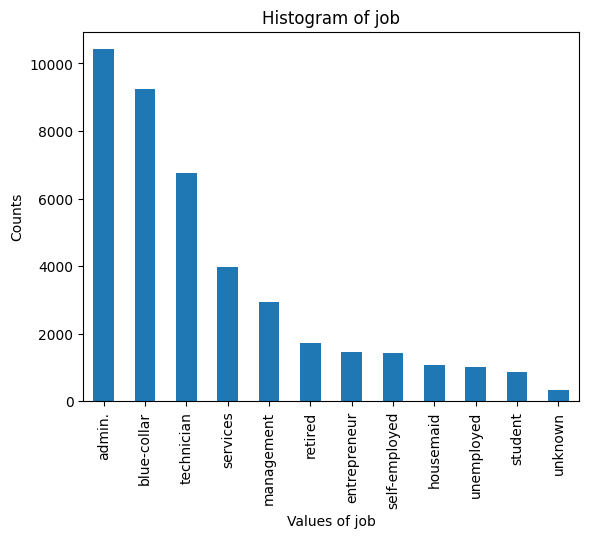

Value counts for marital:
marital
married     24928
single      11568
divorced     4612
unknown        80
Name: count, dtype: int64




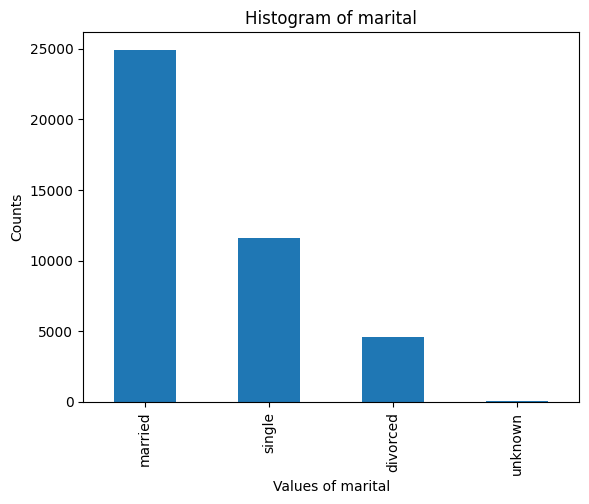

Value counts for education:
education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: count, dtype: int64




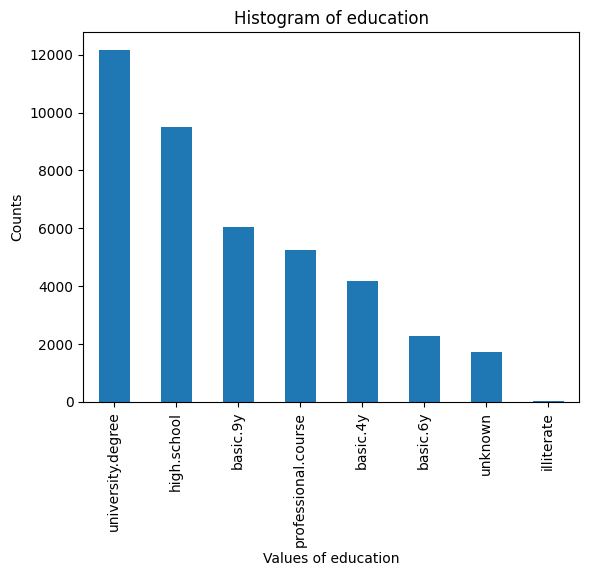

Value counts for default:
default
no         32588
unknown     8597
yes            3
Name: count, dtype: int64




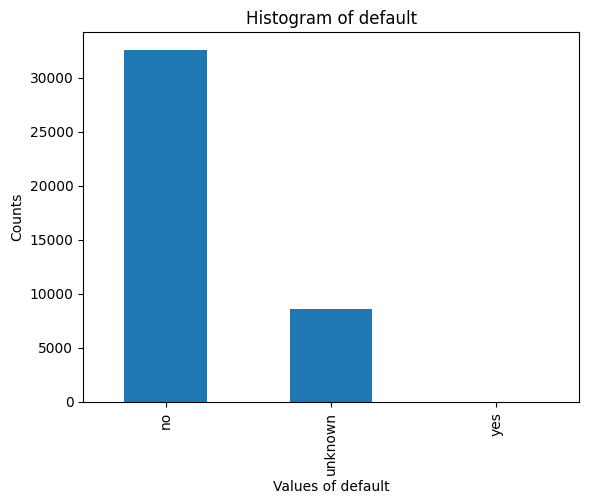

Value counts for housing:
housing
yes        21576
no         18622
unknown      990
Name: count, dtype: int64




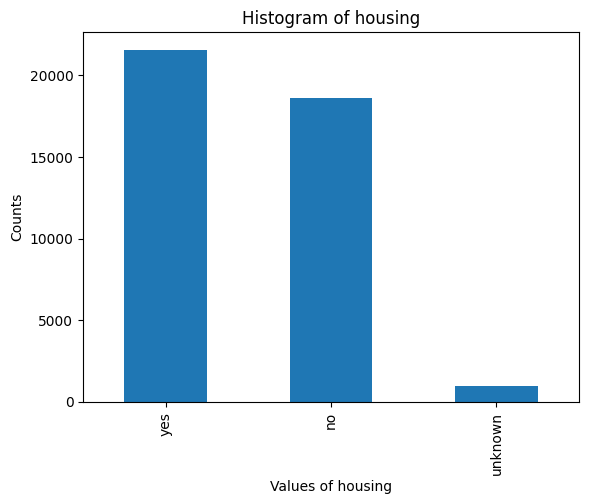

Value counts for loan:
loan
no         33950
yes         6248
unknown      990
Name: count, dtype: int64




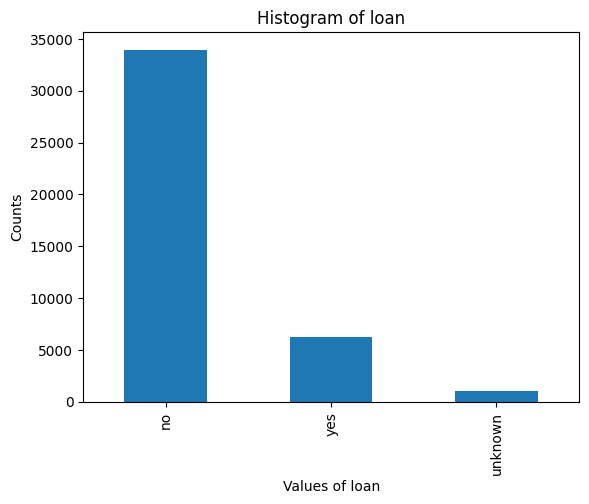

Value counts for contact:
contact
cellular     26144
telephone    15044
Name: count, dtype: int64




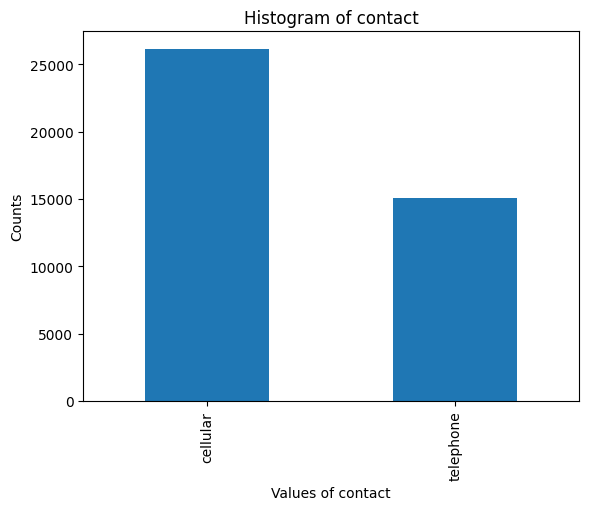

Value counts for month:
month
may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: count, dtype: int64




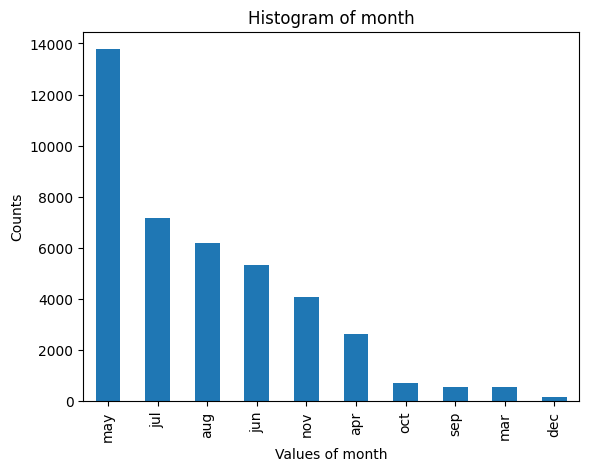

Value counts for day_of_week:
day_of_week
thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: count, dtype: int64




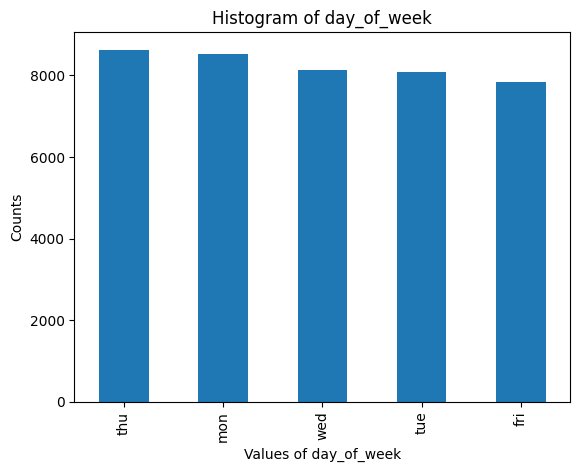

Value counts for poutcome:
poutcome
nonexistent    35563
failure         4252
success         1373
Name: count, dtype: int64




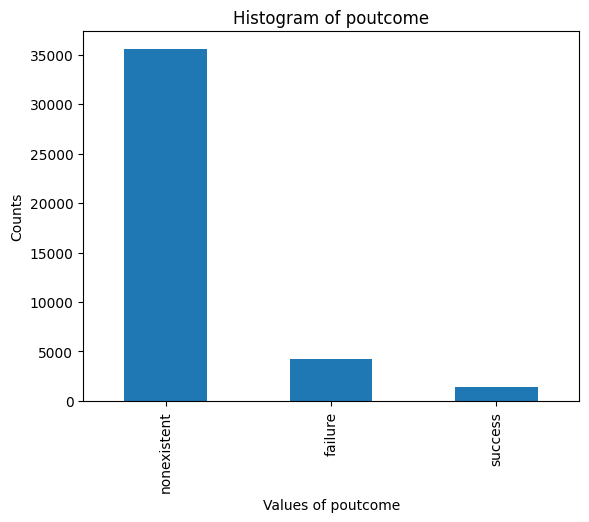

Value counts for subscribed:
subscribed
no     36548
yes     4640
Name: count, dtype: int64




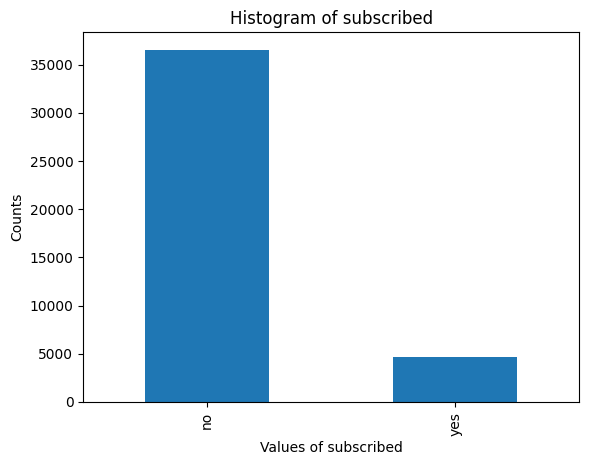

In [63]:
non_numeric_cols = df.select_dtypes(include=["object"]).columns

for col in non_numeric_cols:
    # Print value counts
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")
    
    # Plotting histogram
    df[col].value_counts().plot(kind='bar')
    plt.title(f"Histogram of {col}")
    plt.ylabel('Counts')
    plt.xlabel(f'Values of {col}')
    plt.show()

# Looking at numerical variables

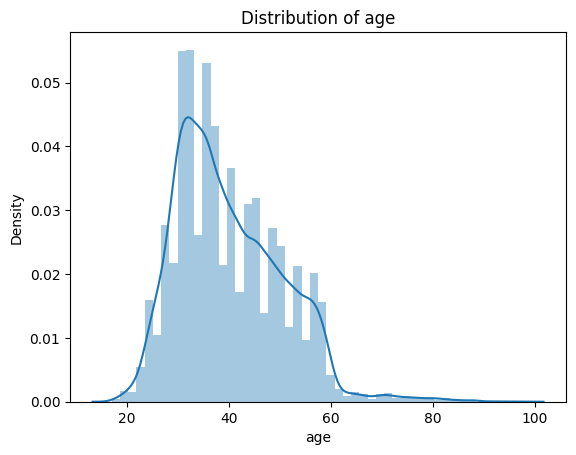

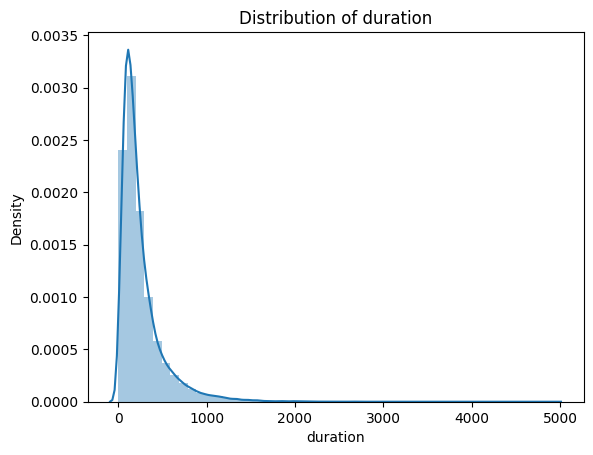

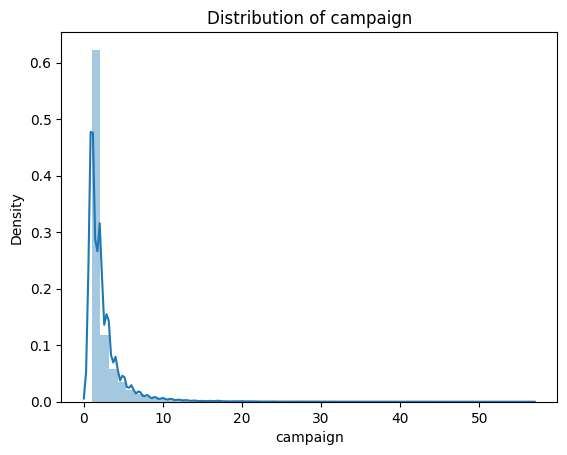

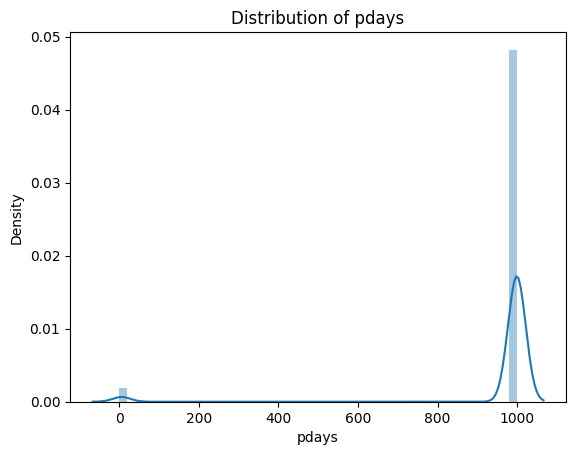

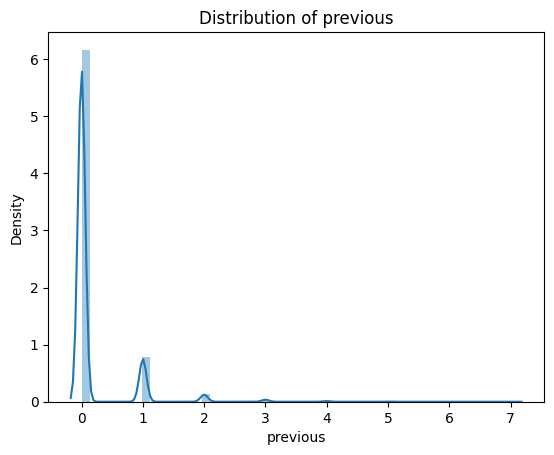

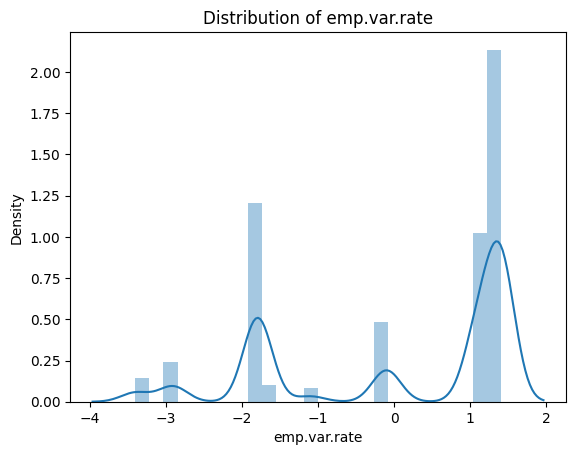

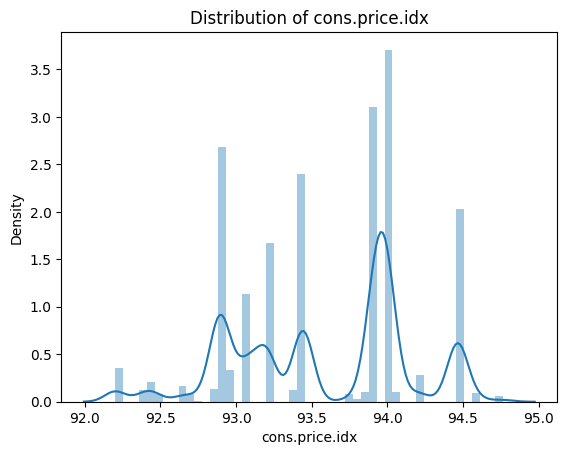

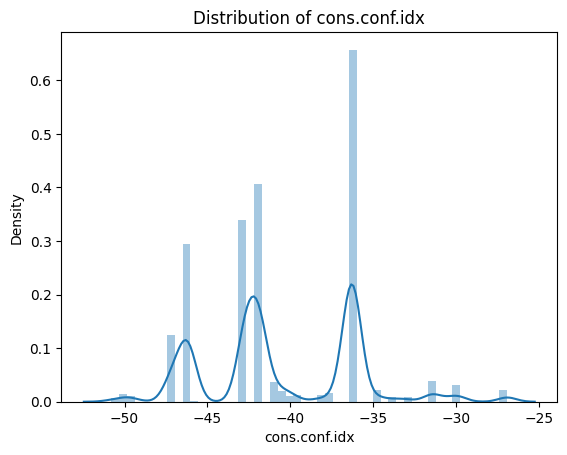

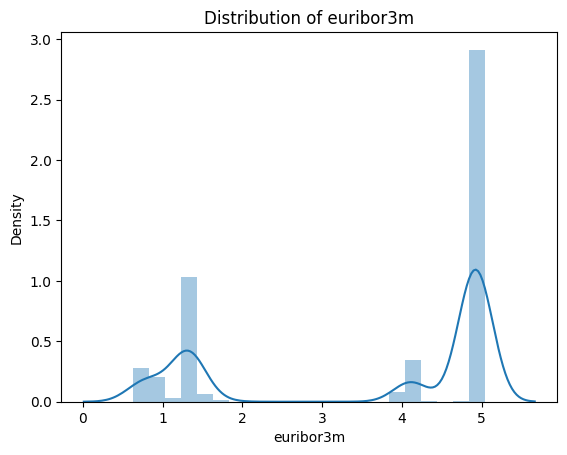

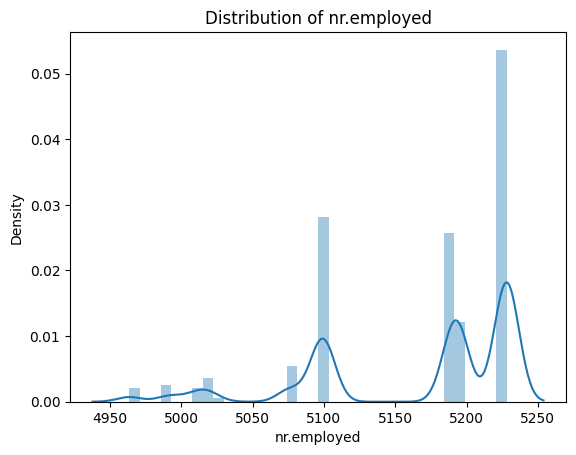

In [64]:
# list of numerical values, plot distribution

numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

for col in numeric_cols:
    # Plotting distribution
    sns.distplot(df[col])
    plt.title(f"Distribution of {col}")
    plt.show()

Duration and Campaign are skewed

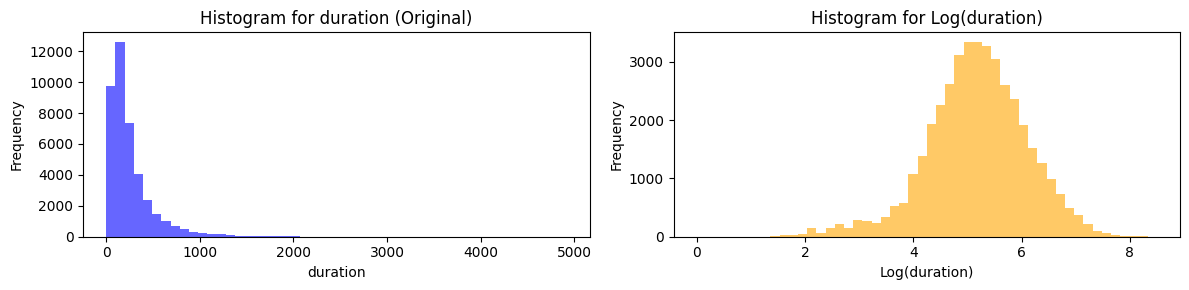

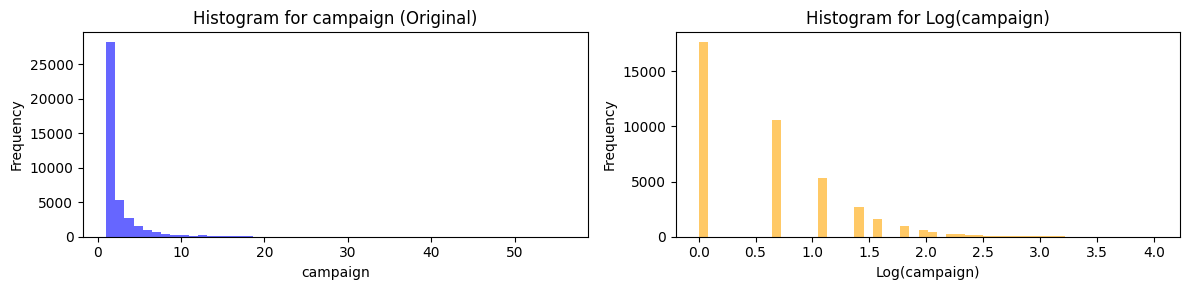

In [65]:
Skewed_columns = ['duration', 'campaign']

for col in Skewed_columns:
    fig, axs = plt.subplots(1, 2, figsize=(12, 3))
    
    # Plot the original variable, dropping NaN values for the plot
    axs[0].hist(df[col].dropna(), bins=50, color='blue', alpha=0.6)
    axs[0].set_xlabel(col)
    axs[0].set_ylabel("Frequency")
    axs[0].set_title(f"Histogram for {col} (Original)")

    positive_col = df[col].dropna()
    positive_col = positive_col[positive_col > 0]

    # Plot the log-transformed variable, also dropping NaN values
    axs[1].hist(np.log(positive_col), bins=50, color='orange', alpha=0.6)
    axs[1].set_xlabel(f"Log({col})")
    axs[1].set_ylabel("Frequency")
    axs[1].set_title(f"Histogram for Log({col})")
    
    plt.tight_layout()
    plt.show()


Duration should be log transformed

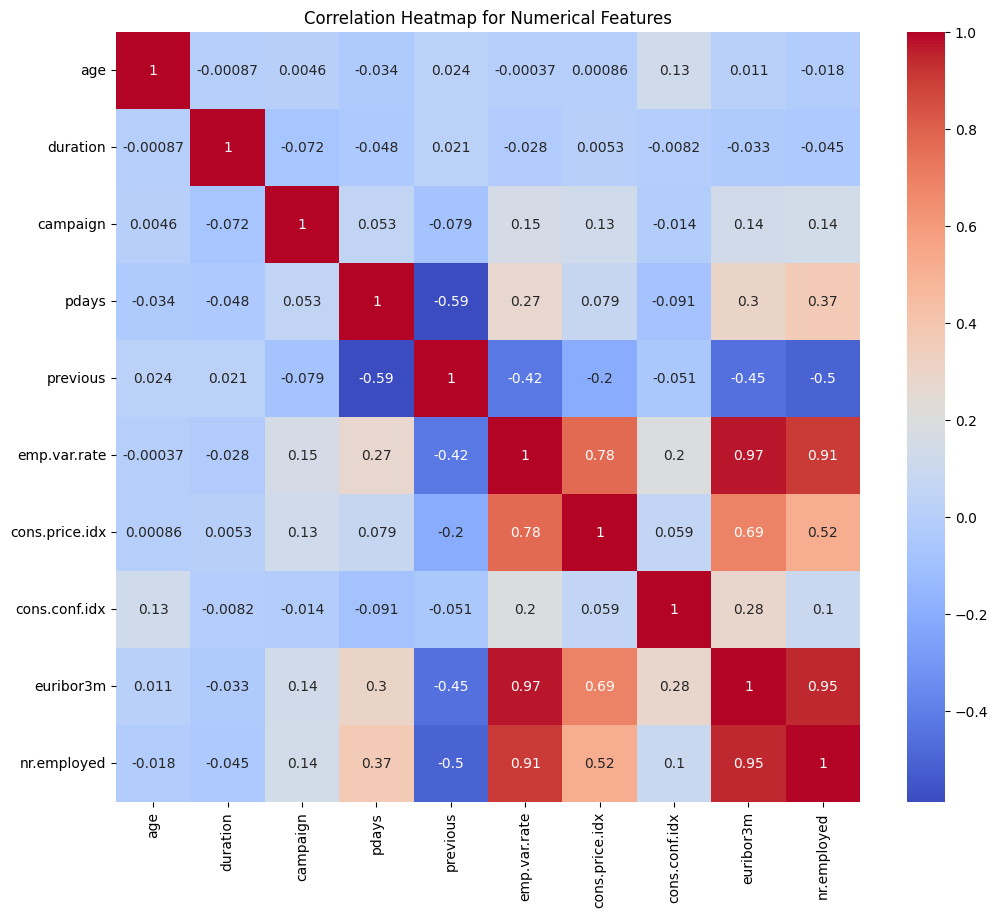

In [66]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

## Outlier Detection

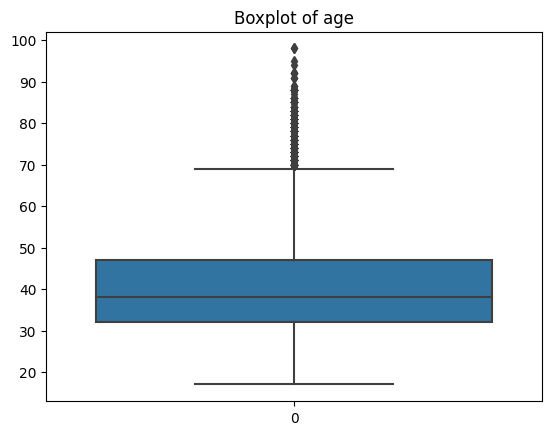

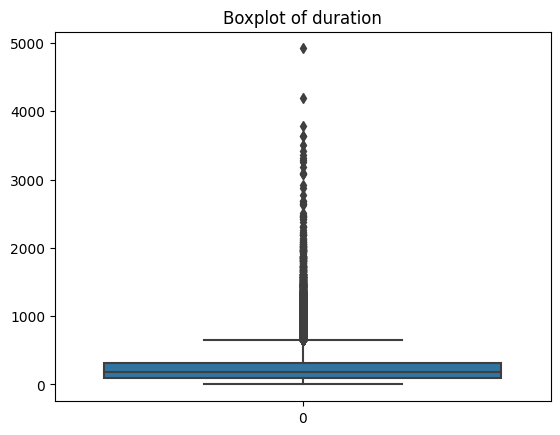

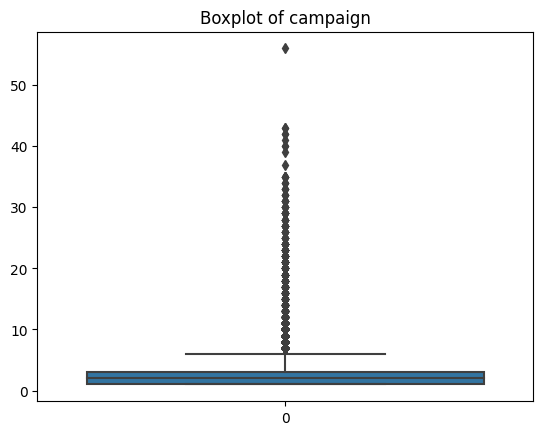

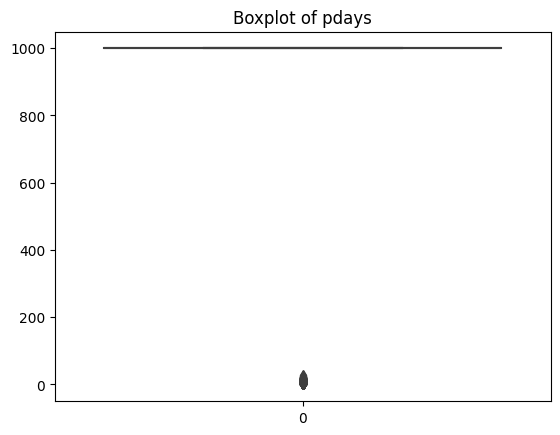

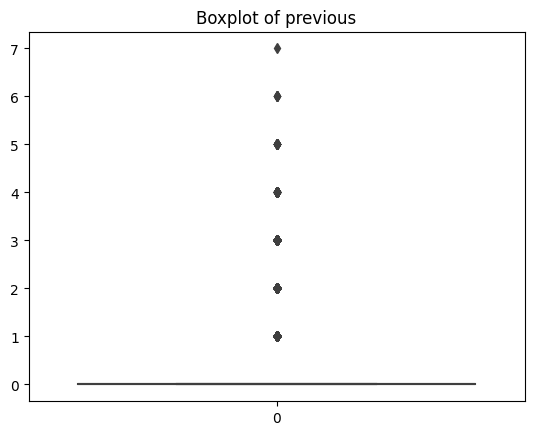

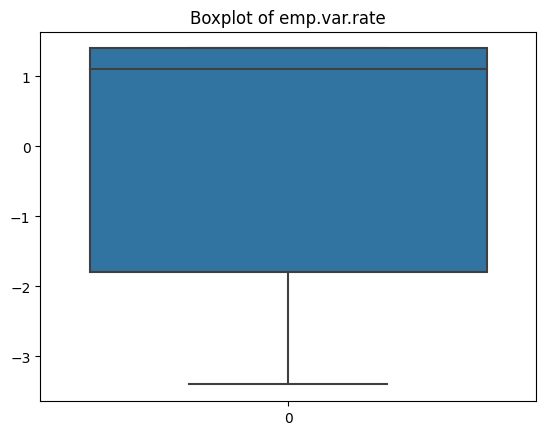

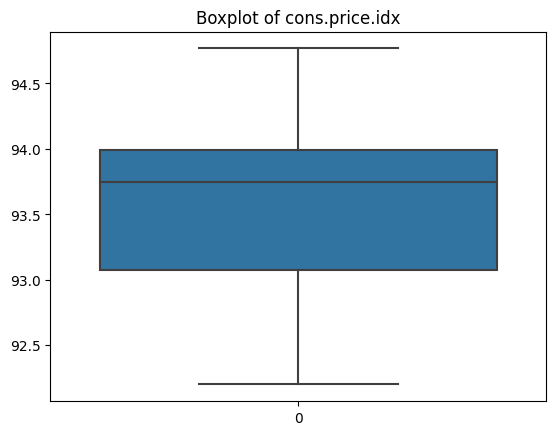

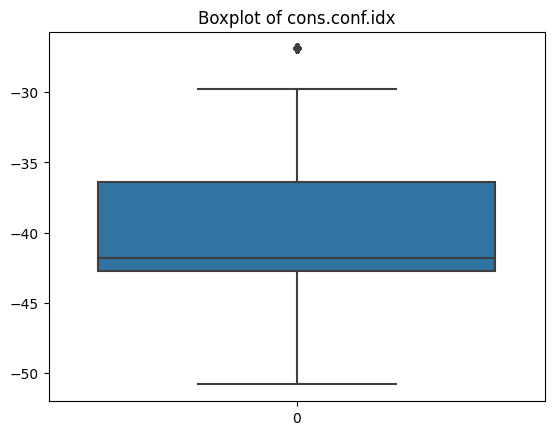

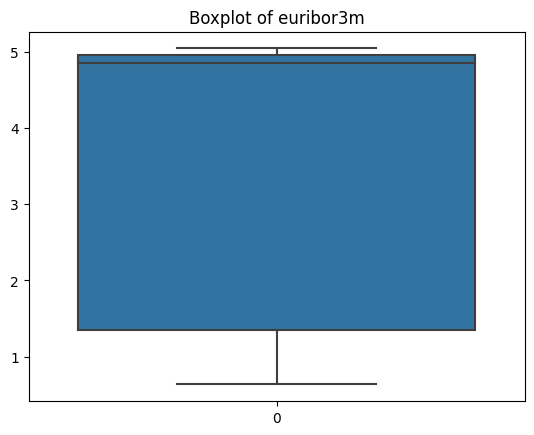

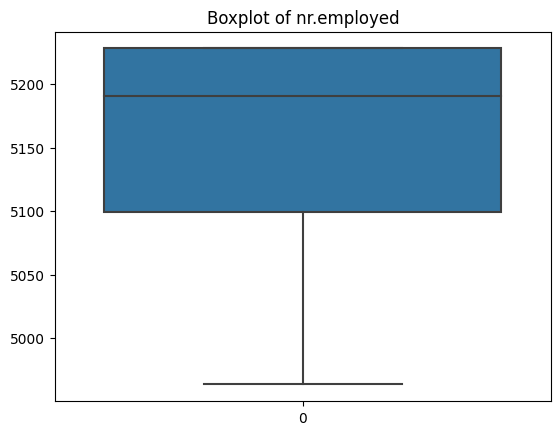

In [67]:
# Outlier detection using boxplot

for col in numeric_cols:
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [68]:

# Outlier detection using z-score
    
from scipy import stats

z = np.abs(stats.zscore(df[numeric_cols]))
threshold = 3
outliers = np.where(z > threshold)
outliers

(array([   37,    75,    83, ..., 41182, 41183, 41187], dtype=int64),
 array([1, 1, 1, ..., 3, 0, 0], dtype=int64))

# Preprocessing for classification

Copy is this part for your script if needed

## Using Pipelines

In [69]:
df_classification = df.copy()

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer 

In [71]:
X = df_classification.drop('subscribed', axis=1)
y = df_classification['subscribed']

# Train, Validation and Test Split

X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_val, y_train_val, test_size=0.25, random_state=0)


In [72]:
numerical_cols = [col for col in X_train.columns if X_train[col].dtype in ['int64', 'float64']]
categorical_cols = [col for col in X_train.columns if X_train[col].dtype == 'object']
duration_col = ['duration']  # Column to log transform

In [73]:
# Log transforming duration
duration_transformer = Pipeline(steps=[
    ('log', FunctionTransformer(np.log1p))  # Adds 1 to duration and applies log (log1p)
])

In [74]:
# scaling transformer for numerical columns
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

In [75]:
# one-hot encoding transformer for categorical columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [76]:
preprocessor_classification = ColumnTransformer(
    transformers=[
        ('duration', duration_transformer, duration_col),
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [77]:
# Applying the preprocessor to each set
X_train_preprocessed = preprocessor_classification.fit_transform(X_train)
X_valid_preprocessed = preprocessor_classification.transform(X_valid)
X_test_preprocessed = preprocessor_classification.transform(X_test)

print(X_train_preprocessed.shape)
print(X_valid_preprocessed.shape)
print(X_test_preprocessed.shape)

(24712, 63)
(8238, 63)
(8238, 63)


## No pipeline (using a dataframe)

In [78]:
X_train['duration'] = np.log1p(X_train['duration'])
X_valid['duration'] = np.log1p(X_valid['duration'])
X_test['duration'] = np.log1p(X_test['duration'])

scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_valid[numerical_cols] = scaler.transform(X_valid[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_train_cat_encoded = pd.DataFrame(encoder.fit_transform(X_train[categorical_cols]), 
                                   columns=encoder.get_feature_names_out(categorical_cols), 
                                   index=X_train.index)
X_valid_cat_encoded = pd.DataFrame(encoder.transform(X_valid[categorical_cols]), 
                                   columns=encoder.get_feature_names_out(categorical_cols), 
                                   index=X_valid.index)
X_test_cat_encoded = pd.DataFrame(encoder.transform(X_test[categorical_cols]), 
                                  columns=encoder.get_feature_names_out(categorical_cols), 
                                  index=X_test.index)

X_train.drop(columns=categorical_cols, inplace=True)
X_valid.drop(columns=categorical_cols, inplace=True)
X_test.drop(columns=categorical_cols, inplace=True)

X_train_preprocessed_df = pd.concat([X_train, X_train_cat_encoded], axis=1)
X_valid_preprocessed_df = pd.concat([X_valid, X_valid_cat_encoded], axis=1)
X_test_preprocessed_df = pd.concat([X_test, X_test_cat_encoded], axis=1)

print(X_train_preprocessed_df.shape)
print(X_valid_preprocessed_df.shape)
print(X_test_preprocessed_df.shape)

X_train_preprocessed_df.head()


(24712, 62)
(8238, 62)
(8238, 62)


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
30566,1.539276,0.550296,0.155232,0.194747,1.710302,-1.197891,-1.181578,-1.233674,-1.310805,-0.942694,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
37038,-0.666694,0.418899,-0.567398,0.194747,-0.347289,-1.896828,-1.913306,1.488240,-1.489615,-1.259669,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
14946,-1.050341,0.776500,1.600491,0.194747,-0.347289,0.835381,0.587338,-0.477587,0.767419,0.842887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
15966,-1.242164,0.776500,0.155232,0.194747,-0.347289,0.835381,0.587338,-0.477587,0.769149,0.842887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
37481,0.580159,-0.069093,-0.567398,0.194747,-0.347289,-1.896828,-2.375813,1.963495,-1.588248,-1.259669,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# Preprocessing for clustering

## Using Pipelines

In [99]:
df_cluster = df.copy()
df_cluster = df_cluster.drop(columns=['nr.employed', 'emp.var.rate'], axis=1)

In [100]:
numerical_cols_c = df_cluster.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_cluster.select_dtypes(include=['object']).columns
duration_col = ['duration']  # Column to log transform

In [101]:
preprocessor_cluster = ColumnTransformer(
    transformers=[
        ('duration', duration_transformer, duration_col),
        ('num', numerical_transformer, numerical_cols_c),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [102]:
X_preprocessed = preprocessor_cluster.fit_transform(df_cluster)

print(X_preprocessed.shape)

(41188, 64)


## No Pipeline (using a dataframe)

In [109]:
X_preprocessed_df = df_cluster.copy()

X_preprocessed_df['duration'] = np.log1p(df_cluster['duration'])

scaler = StandardScaler()
X_preprocessed_df[numerical_cols_c] = scaler.fit_transform(X_preprocessed_df[numerical_cols_c])

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
X_cat_encoded = pd.DataFrame(encoder.fit_transform(X_preprocessed_df[categorical_cols]), 
                                   columns=encoder.get_feature_names_out(categorical_cols), 
                                   index=X_preprocessed_df.index)

X_preprocessed_df.drop(columns=categorical_cols, inplace=True)

X_preprocessed_df = pd.concat([X_preprocessed_df, X_cat_encoded], axis=1)

print(X_preprocessed_df.shape)

X_preprocessed_df.head()

(41188, 63)


,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,subscribed_no,subscribed_yes
0,1.533034,0.431124,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.628993,-0.177114,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,-0.290186,0.274738,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,-0.002309,-0.162669,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,1.533034,0.607534,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [110]:
# Keeping only continuous variables
X_cluster = X_preprocessed_df.copy()

prefixes = ['job_', 'marital_', 'education_', 'default_', 'housing_', 'loan_', 'contact_', 'month_', 'day_of_week_', 'poutcome_', 'subscribed_']
one_hot_cols = [col for col in X_preprocessed_df.columns if any(col.startswith(prefix) for prefix in prefixes)]

# Keeping only one-hot encoded variables
X_cluster = X_preprocessed_df.drop(one_hot_cols, axis=1)

X_cluster.head()

,age,duration,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m
0,1.533034,0.431124,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246
1,1.628993,-0.177114,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246
2,-0.290186,0.274738,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246
3,-0.002309,-0.162669,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246
4,1.533034,0.607534,-0.565922,0.195414,-0.349494,0.722722,0.886447,0.71246


In [111]:
from sklearn.mixture import GaussianMixture         

from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score 

# all scores for best parameters
GMM = GaussianMixture (n_components = 2 , random_state = 1 , covariance_type = 'diag', init_params='k-means++')
GMM.fit (X_cluster)
gmmV = df_cluster.copy ()
gmmV['cluster'] = GMM.predict (X_cluster)


print ('silhouette_score : ' , silhouette_score (X_cluster , GMM.predict(X_cluster)))
print ('calinski_harabasz_score : ' , calinski_harabasz_score (X_cluster, GMM.predict(X_cluster)))
print ('davies_bouldin_score : ' , davies_bouldin_score (X_cluster, GMM.predict(X_cluster)))

silhouette_score :  0.3602813465255337
calinski_harabasz_score :  8465.606260925839
davies_bouldin_score :  1.619821778350159


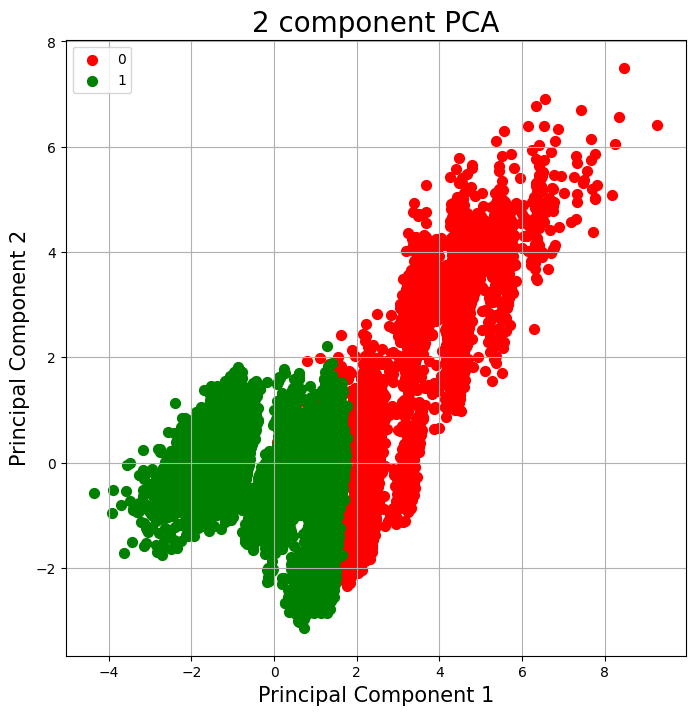

In [112]:
# Visualizing the clusters using PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_cluster)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, gmmV[['cluster']]], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['cluster'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [130]:
# Print unscaled centroids
used_columns = X_cluster.columns
centroids_unscaled = pd.DataFrame(scaler.inverse_transform(GMM.means_), columns=used_columns)
print(centroids_unscaled)

         age  duration  campaign       pdays      previous  cons.price.idx  \
0  40.453200  5.256641  1.957155  731.556305  1.266487e+00       93.132828   
1  39.956183  5.159812  2.664146  999.000000  6.661338e-16       93.645708   

   cons.conf.idx  euribor3m  
0     -41.663079   1.491312  
1     -40.319047   3.958190  


In [131]:
df_cluster['cluster'] = GMM.predict(X_cluster)
for col in categorical_cols:
    print(df_cluster.groupby(['cluster', col]).size() / df_cluster.groupby('cluster').size())

cluster  job          
0        admin.           0.270044
         blue-collar      0.178667
         entrepreneur     0.031822
         housemaid        0.019911
         management       0.075733
         retired          0.068978
         self-employed    0.031111
         services         0.092089
         student          0.049956
         technician       0.147378
         unemployed       0.027733
         unknown          0.006578
1        admin.           0.250344
         blue-collar      0.231955
         entrepreneur     0.035908
         housemaid        0.026657
         management       0.070242
         retired          0.037455
         self-employed    0.035036
         services         0.097039
         student          0.016703
         technician       0.166296
         unemployed       0.024126
         unknown          0.008239
dtype: float64
cluster  marital 
0        divorced    0.112178
         married     0.552356
         single      0.332267
         unkno

In [132]:
from sklearn.cluster import MeanShift

MS = MeanShift ()
MS.fit (X_cluster)
labels = MS.labels_
len (set (labels))

In [ ]:
print (MS.get_params())

# print scores
print ('silhouette_score : ' , silhouette_score (X_cluster , labels))
print ('calinski_harabasz_score : ' , calinski_harabasz_score (X_cluster, labels))
print ('davies_bouldin_score : ' , davies_bouldin_score (X_cluster, labels))

In [ ]:
# print cluster counts
print (pd.Series(labels).value_counts())

In [ ]:
# Visualizing the clusters using PCA for the 4 clusters

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X_cluster)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, pd.DataFrame({'cluster': labels})], axis = 1)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = list(set(labels))
colors = ['r', 'g', 'b', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['cluster'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
# Analyzing the clusters

MSv = df_cluster.copy ()
MSv ['cluster'] = MS.labels_

cluster_stats = MSv.groupby('cluster').describe()
print(cluster_stats)

In [ ]:
for col in categorical_cols:
    print(MSv.groupby(['cluster', col]).size() / MSv.groupby('cluster').size())